In [1]:
import pandas as pd
import numpy as np

from coactivation.process import preprocess_emgs, get_coactivation_map, emgs, mirror_left_right_emgs, get_coactivation_difference, get_stratified_cm
from coactivation.visualize import visualize_emgs, plot_coactivation_map, plot_one_class_coactivation_map, visualize_stratified_median_emgs

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from matplotlib.colors import LinearSegmentedColormap

# Case study on 2024_11_04

* within sessions
* between 50 and 200 hz


## Between sessions (50hz vs 200hz)

In [2]:
p1_111_50hz = preprocess_emgs('collected_data/2024_11_04/p1_111_50hz.csv')
p1_111_50hz_cm = get_coactivation_map(p1_111_50hz)
p1_111_50hz_cm

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.056383,0.083474,0.075856,0.081105,0.058209,0.047083,0.122206,0.108179
1,0.067021,0.145868,0.381129,0.221034,0.226119,0.139202,0.205663,0.122691
2,0.243617,0.252108,0.317299,0.453654,0.444030,0.494371,0.441133,0.403694


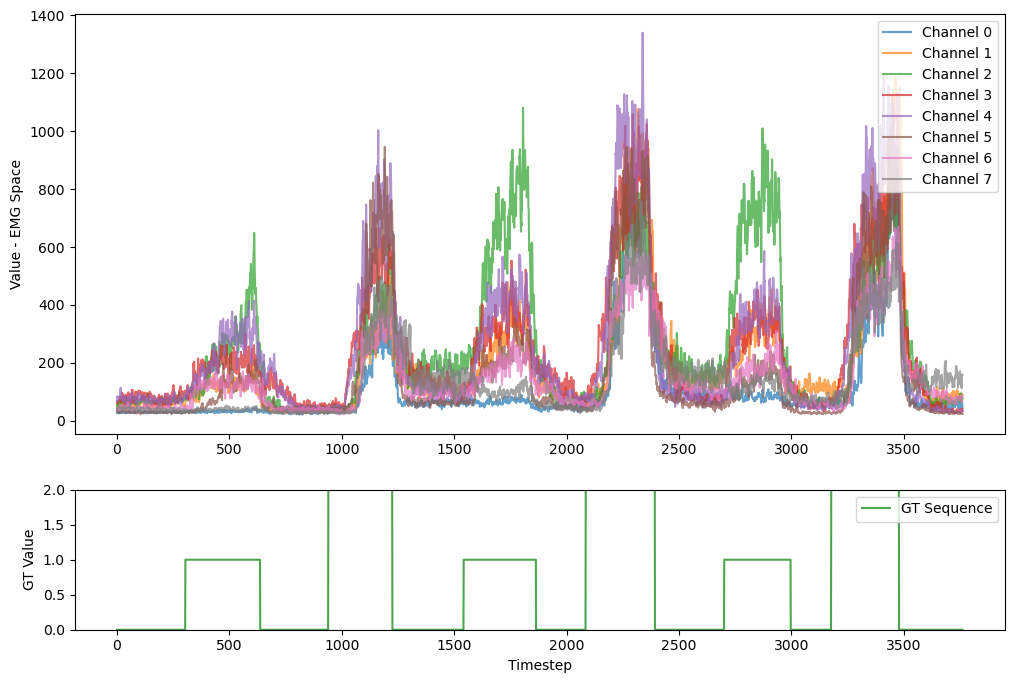

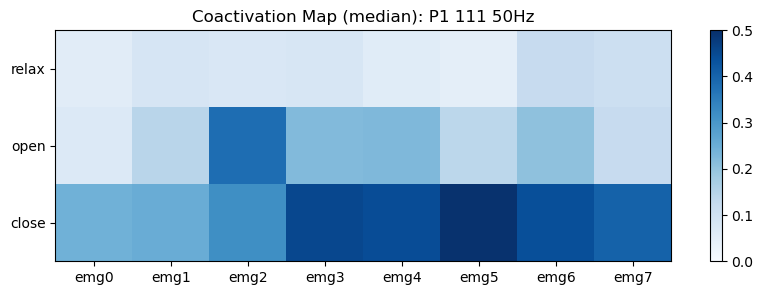

In [3]:
visualize_emgs('collected_data/2024_11_04/p1_111_50hz.csv')
plot_coactivation_map(p1_111_50hz_cm, title='P1 111 50Hz')

In [4]:
p1_111_50hz_cm/np.max(p1_111_50hz_cm)*0.5

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.057025,0.084424,0.076719,0.082029,0.058872,0.047619,0.123597,0.109411
1,0.067784,0.147529,0.385469,0.223551,0.228694,0.140787,0.208005,0.124088
2,0.246391,0.254979,0.320912,0.458820,0.449086,0.500000,0.446156,0.408291


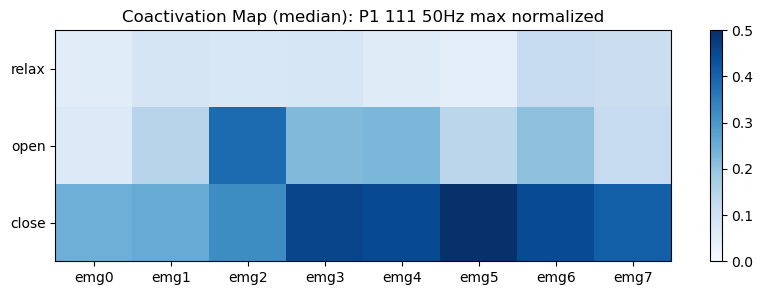

In [5]:
plot_coactivation_map(p1_111_50hz_cm/np.max(p1_111_50hz_cm)*0.5, title="P1 111 50Hz max normalized")

In [6]:
p1_111_200hz = preprocess_emgs('collected_data/2024_11_04/p1_111_200hz.csv', hz=200)
p1_111_200hz_cm = get_coactivation_map(p1_111_200hz)
p1_111_200hz_cm

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015625,0.023438,0.031250,0.023438,0.031250,0.015625,0.023438,0.023438
1,0.015625,0.062500,0.179688,0.078125,0.101562,0.039062,0.070312,0.023438
2,0.062500,0.140625,0.156250,0.132812,0.125000,0.078125,0.070312,0.101562


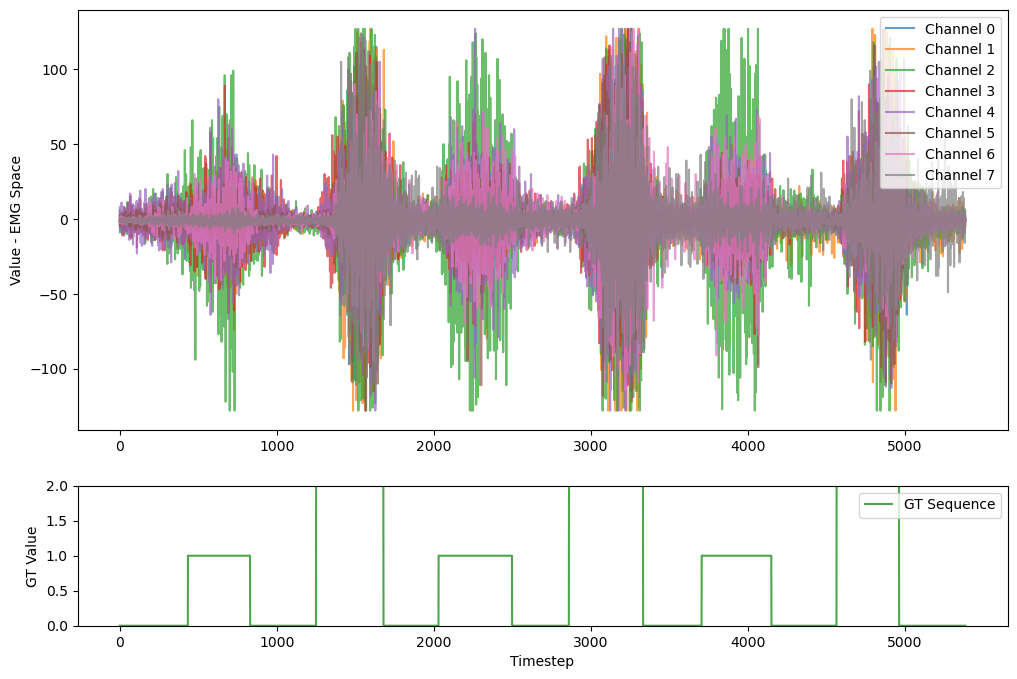

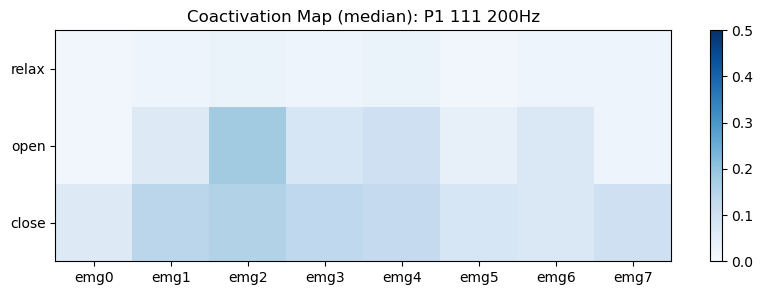

In [7]:
visualize_emgs('collected_data/2024_11_04/p1_111_200hz.csv')
plot_coactivation_map(p1_111_200hz_cm, title='P1 111 200Hz')

In [8]:
p1_111_200hz_cm/np.max(p1_111_200hz_cm)*0.5

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.043478,0.065217,0.086957,0.065217,0.086957,0.043478,0.065217,0.065217
1,0.043478,0.173913,0.500000,0.217391,0.282609,0.108696,0.195652,0.065217
2,0.173913,0.391304,0.434783,0.369565,0.347826,0.217391,0.195652,0.282609


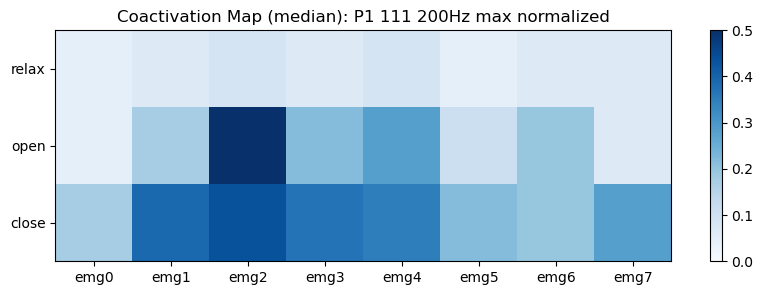

In [9]:
plot_coactivation_map(p1_111_200hz_cm/np.max(p1_111_200hz_cm)*0.5, title="P1 111 200Hz max normalized")

## Within 50Hz

In [10]:
p1_111_50hz_stratified_cm = get_stratified_cm(p1_111_50hz)
p1_111_50hz_stratified_cm

,window,gt,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
0,0,0,0.030851,0.053963,0.062905,0.073975,0.054478,0.030706,0.068554,0.052770
1,1,1,0.034043,0.099494,0.223867,0.172906,0.182090,0.114637,0.172876,0.050132
2,2,0,0.030851,0.030354,0.043478,0.059715,0.039552,0.040942,0.061103,0.039578
3,3,2,0.111702,0.169477,0.209066,0.297683,0.314925,0.230297,0.154993,0.145119
4,4,0,0.067021,0.109612,0.178538,0.129234,0.082836,0.069601,0.150522,0.220317
5,5,1,0.070213,0.201096,0.549491,0.277184,0.271642,0.205220,0.251863,0.137203
6,6,0,0.050000,0.072513,0.072155,0.115865,0.075373,0.054248,0.113264,0.062005
7,7,2,0.395213,0.365514,0.399167,0.558824,0.555224,0.590072,0.583458,0.407652
8,8,0,0.109574,0.131535,0.170213,0.080660,0.056716,0.065507,0.183308,0.228232
9,9,1,0.087234,0.228499,0.617021,0.266934,0.248507,0.139202,0.248137,0.163588


In [11]:
p1_111_50hz_stratified_cm[np.append(['gt'],emgs)].groupby(by='gt').var()

,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.000717,0.001165,0.003003,0.000872,0.000365,0.000282,0.002089,0.006814
1,0.000738,0.004619,0.044194,0.003303,0.002161,0.002195,0.001986,0.003525
2,0.021246,0.018140,0.013438,0.021523,0.016934,0.036998,0.058942,0.033411


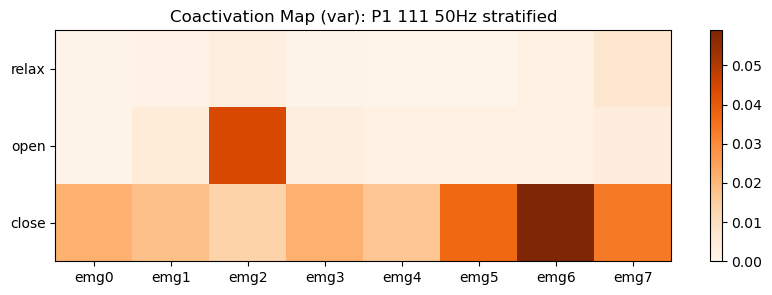

In [12]:
plot_coactivation_map(p1_111_50hz_stratified_cm[np.append(['gt'],emgs)].groupby(by='gt').var(), title='P1 111 50Hz stratified', metric='var')

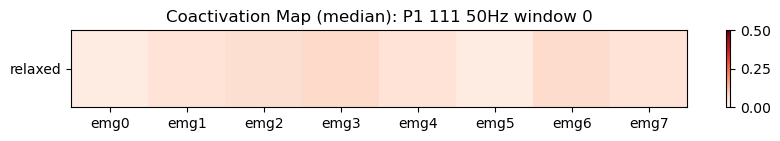

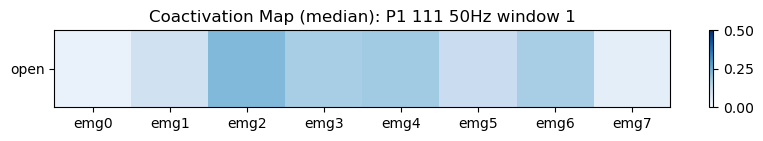

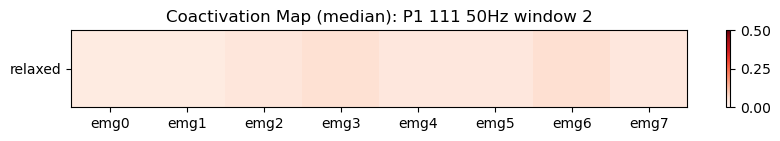

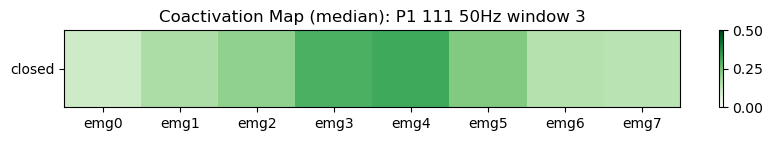

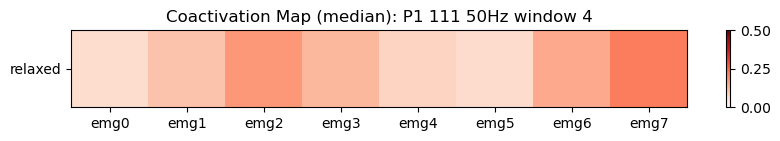

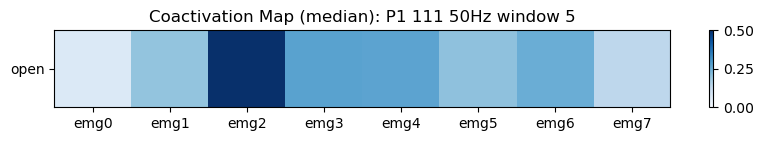

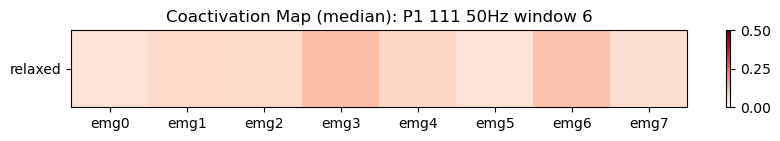

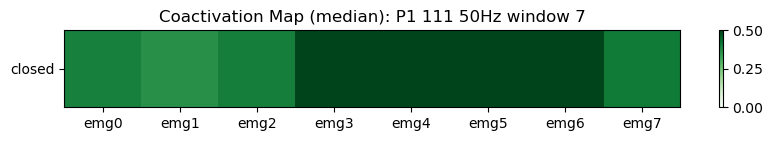

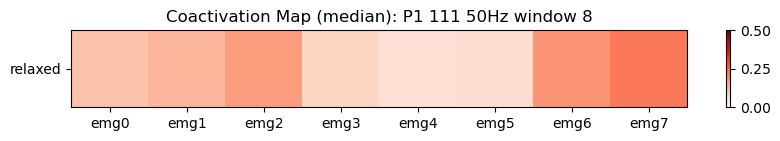

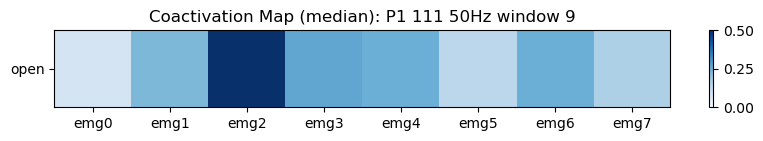

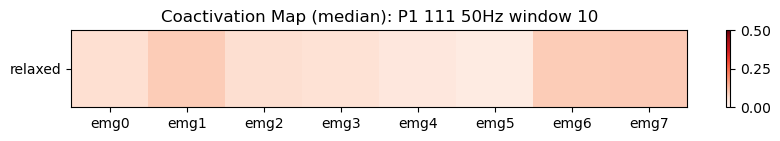

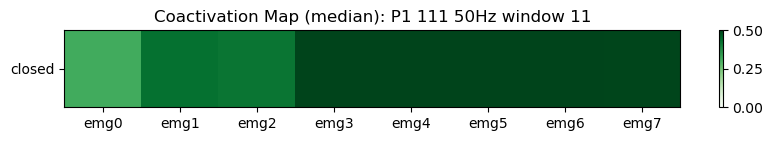

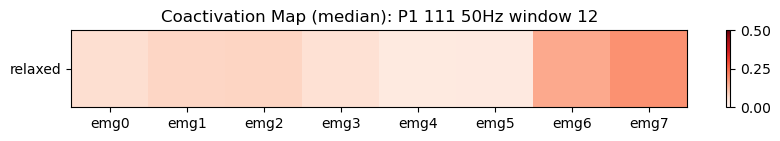

In [13]:
cmap_dict = {0: ('relaxed', 'Reds'), 1: ('open', 'Blues'), 2: ('closed','Greens')}
for i in range(len(p1_111_50hz_stratified_cm)):
    cm = p1_111_50hz_stratified_cm.iloc[i]
    plot_one_class_coactivation_map(cm[emgs], title=f'P1 111 50Hz window {i}', cmap=cmap_dict[cm['gt']][1], label=cmap_dict[cm['gt']][0])

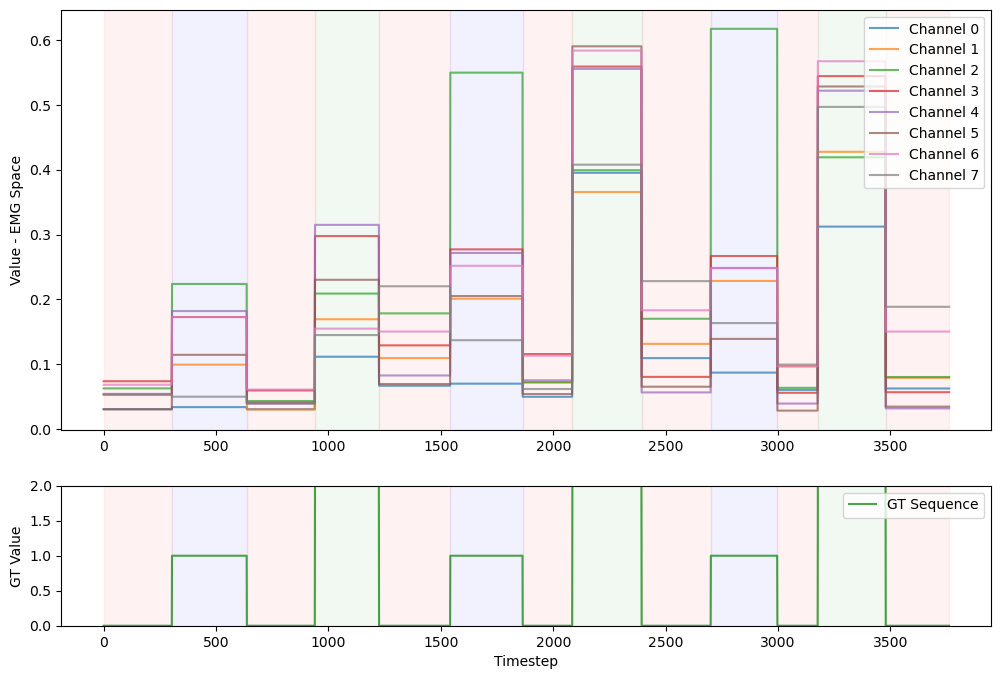

In [14]:
visualize_stratified_median_emgs('collected_data/2024_11_04/p1_111_50hz.csv')

## Within 200Hz


In [15]:
p1_111_200hz_stratified_cm = get_stratified_cm(p1_111_200hz)
p1_111_200hz_stratified_cm

,window,gt,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
0,0,0,0.007812,0.015625,0.031250,0.031250,0.046875,0.015625,0.015625,0.007812
1,1,1,0.015625,0.070312,0.156250,0.085938,0.078125,0.031250,0.046875,0.015625
2,2,0,0.007812,0.015625,0.023438,0.023438,0.023438,0.015625,0.007812,0.007812
3,3,2,0.062500,0.132812,0.171875,0.117188,0.109375,0.062500,0.062500,0.085938
4,4,0,0.023438,0.046875,0.046875,0.023438,0.039062,0.023438,0.039062,0.046875
5,5,1,0.023438,0.062500,0.218750,0.078125,0.117188,0.046875,0.078125,0.031250
6,6,0,0.015625,0.023438,0.015625,0.023438,0.039062,0.015625,0.023438,0.023438
7,7,2,0.085938,0.179688,0.164062,0.152344,0.156250,0.101562,0.085938,0.109375
8,8,0,0.023438,0.046875,0.039062,0.023438,0.031250,0.023438,0.046875,0.054688
9,9,1,0.015625,0.054688,0.187500,0.078125,0.101562,0.039062,0.078125,0.039062


In [16]:
p1_111_200hz_stratified_cm[np.append(['gt'],emgs)].groupby(by='gt').var()

,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.000049,0.000177,0.000102,0.000029,0.000134,0.000029,0.000198,0.000416
1,0.000020,0.000061,0.000977,0.000020,0.000387,0.000061,0.000326,0.000142
2,0.000387,0.000875,0.000142,0.000320,0.000570,0.000387,0.000183,0.000158


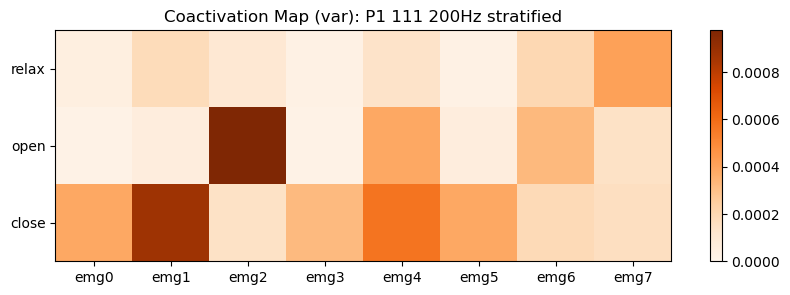

In [17]:
plot_coactivation_map(p1_111_200hz_stratified_cm[np.append(['gt'],emgs)].groupby(by='gt').var(), title='P1 111 200Hz stratified', metric='var')

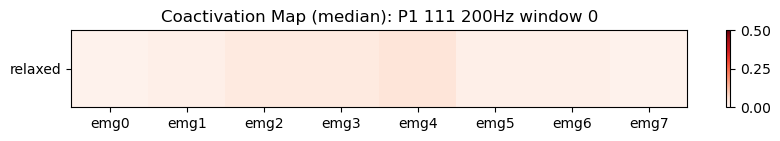

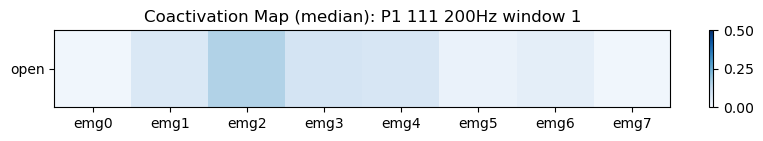

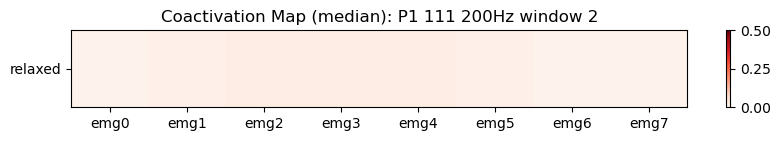

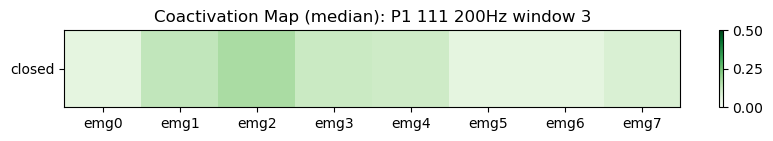

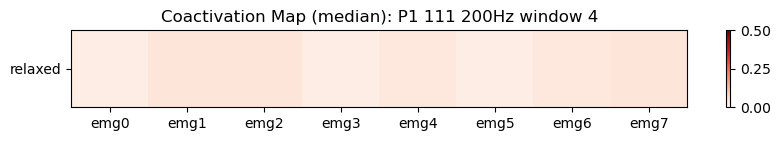

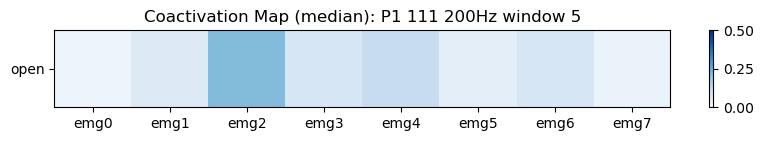

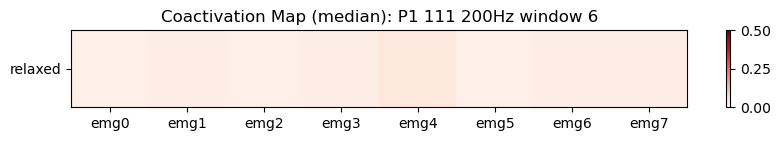

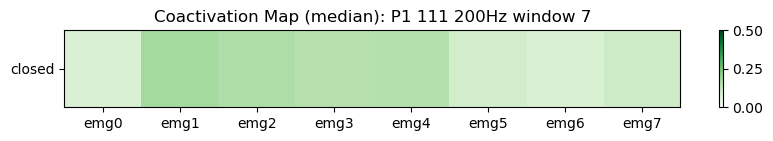

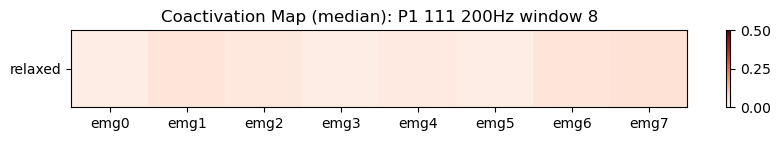

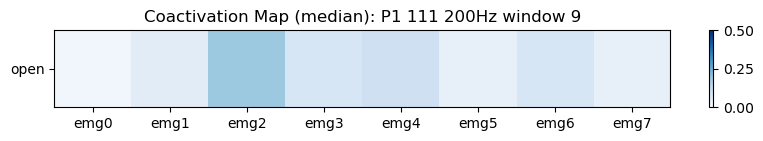

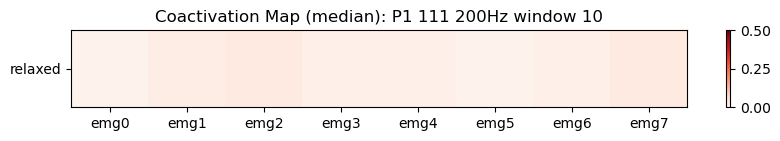

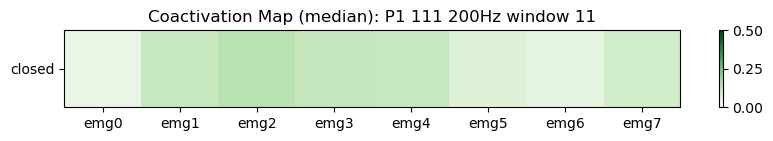

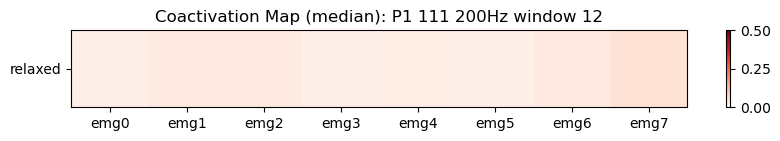

In [18]:
cmap_dict = {0: ('relaxed', 'Reds'), 1: ('open', 'Blues'), 2: ('closed','Greens')}
for i in range(len(p1_111_200hz_stratified_cm)):
    cm = p1_111_200hz_stratified_cm.iloc[i]
    plot_one_class_coactivation_map(cm[emgs], title=f'P1 111 200Hz window {i}', cmap=cmap_dict[cm['gt']][1], label=cmap_dict[cm['gt']][0])

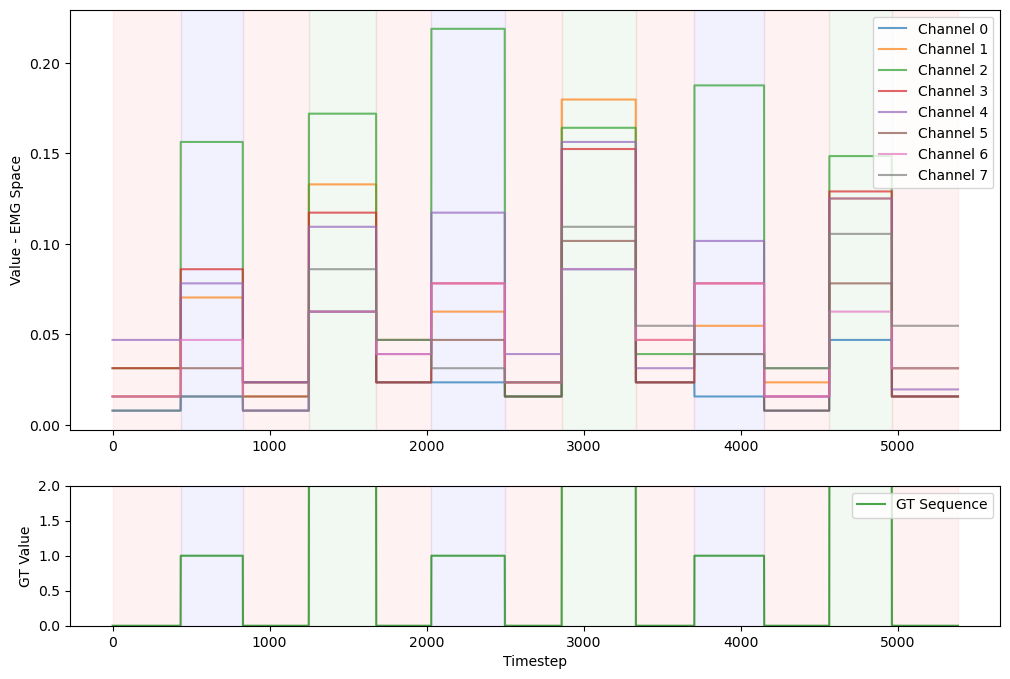

In [19]:
visualize_stratified_median_emgs('collected_data/2024_11_04/p1_111_200hz.csv', hz=200)

# Ava open demo dataset

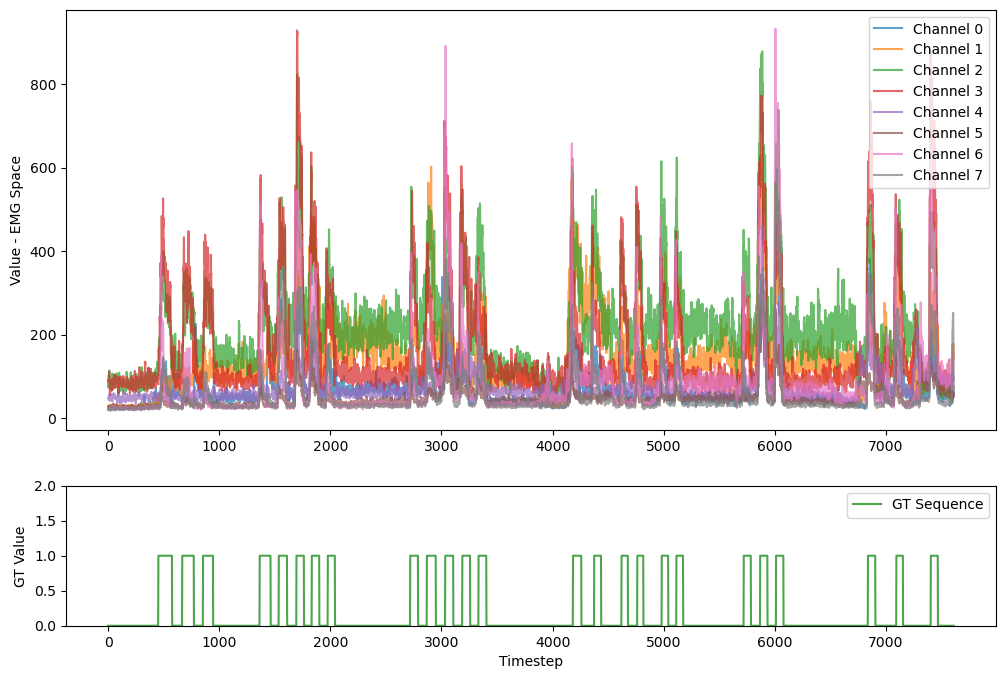

In [20]:
visualize_emgs('data_slack/ava_real_result.csv')

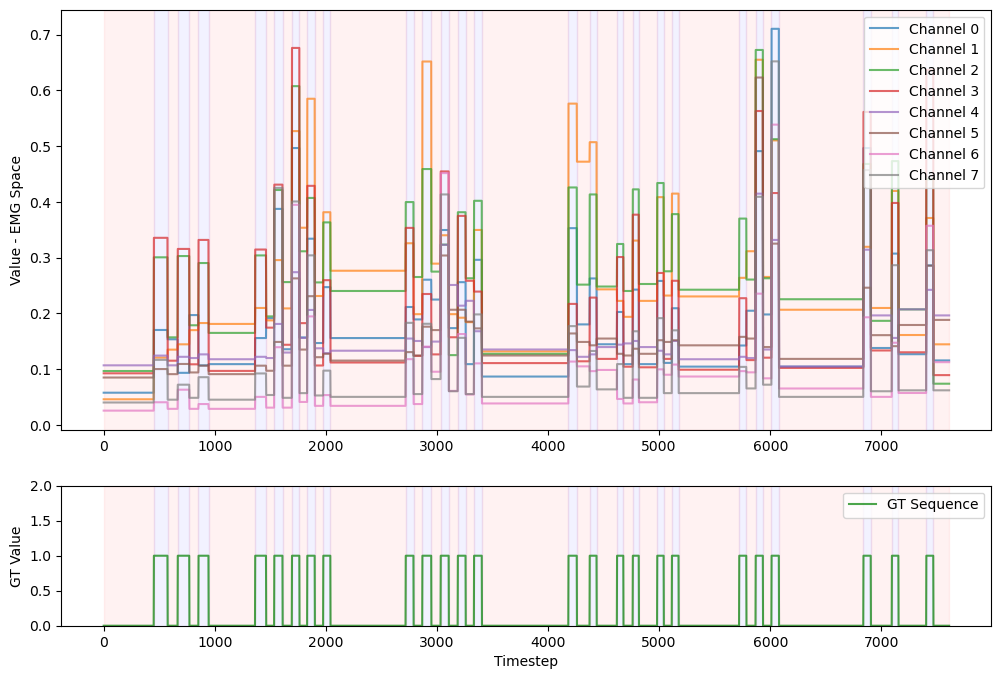

In [21]:
visualize_stratified_median_emgs('data_slack/ava_real_result.csv')

In [22]:
pd.read_csv('data_slack/ava_real_result.csv')

,gt,time_elapsed,current_time,current_task,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg_timer_stamp
0,0,0.031164,20250129172454354,NaN,21,27,83,91,48,28,22,21,1738189494353980064
1,0,0.051199,20250129172454374,NaN,21,26,81,90,48,28,22,22,1738189494374009847
2,0,0.061138,20250129172454384,NaN,21,26,73,91,46,28,21,19,1738189494383986473
3,0,0.091265,20250129172454414,NaN,21,25,79,87,46,29,22,21,1738189494414009094
4,0,0.111350,20250129172454434,NaN,25,27,85,95,46,28,22,21,1738189494434010982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,0,154.561269,20250129172728884,NaN,95,153,64,58,61,61,153,252,1738189648883998632
7607,0,154.581219,20250129172728904,NaN,99,179,70,60,61,58,142,229,1738189648904006719
7608,0,154.601158,20250129172728924,NaN,89,171,73,56,59,57,98,156,1738189648923975229
7609,0,154.621251,20250129172728944,NaN,67,142,69,57,61,52,71,109,1738189648944016695


In [23]:
ava=preprocess_emgs('data_slack/ava_real_result.csv')
ava

,gt,time_elapsed,current_time,current_task,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg_timer_stamp
0,0,0.031164,20250129172454354,NaN,0.046771,0.042925,0.094533,0.098060,0.104803,0.085106,0.023605,0.035294,1738189494353980064
1,0,0.051199,20250129172454374,NaN,0.046771,0.041335,0.092255,0.096983,0.104803,0.085106,0.023605,0.036975,1738189494374009847
2,0,0.061138,20250129172454384,NaN,0.046771,0.041335,0.083144,0.098060,0.100437,0.085106,0.022532,0.031933,1738189494383986473
3,0,0.091265,20250129172454414,NaN,0.046771,0.039746,0.089977,0.093750,0.100437,0.088146,0.023605,0.035294,1738189494414009094
4,0,0.111350,20250129172454434,NaN,0.055679,0.042925,0.096811,0.102371,0.100437,0.085106,0.023605,0.035294,1738189494434010982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,0,154.561269,20250129172728884,NaN,0.211581,0.243243,0.072893,0.062500,0.133188,0.185410,0.164163,0.423529,1738189648883998632
7607,0,154.581219,20250129172728904,NaN,0.220490,0.284579,0.079727,0.064655,0.133188,0.176292,0.152361,0.384874,1738189648904006719
7608,0,154.601158,20250129172728924,NaN,0.198218,0.271860,0.083144,0.060345,0.128821,0.173252,0.105150,0.262185,1738189648923975229
7609,0,154.621251,20250129172728944,NaN,0.149220,0.225755,0.078588,0.061422,0.133188,0.158055,0.076180,0.183193,1738189648944016695


In [24]:
stratified_ava= get_stratified_cm(ava)

In [25]:
stratified_ava[(stratified_ava.window==1)|(stratified_ava.window==3)|(stratified_ava.window==5)][emgs].var()

emg0    0.001685
emg1    0.000978
emg2    0.000045
emg3    0.000112
emg4    0.000005
emg5    0.000022
emg6    0.000197
emg7    0.000522
dtype: float64

In [34]:


plot_one_class_coactivation_map(stratified_ava[(stratified_ava.window==1)|(stratified_ava.window==3)|(stratified_ava.window==5)][emgs].var(), metric='var',title='ava group 1', cmap='Oranges', label='open')

/Users/elise/Desktop/myhand/coactivation/visualize.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,1))


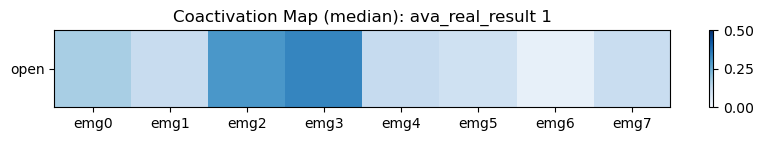

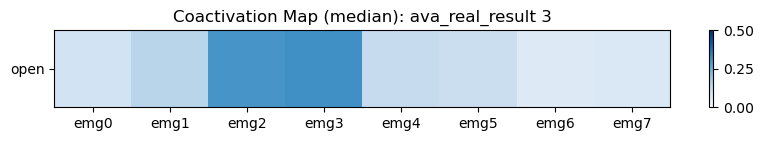

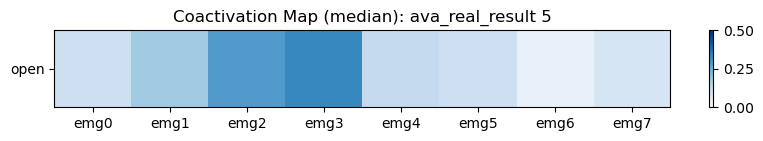

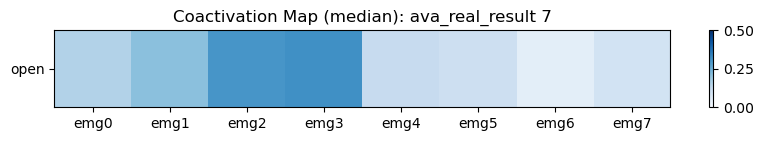

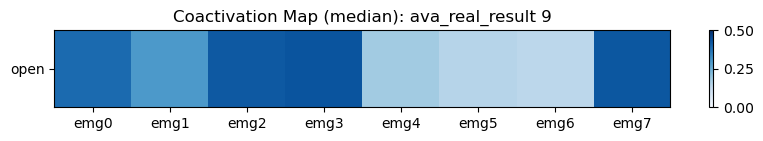

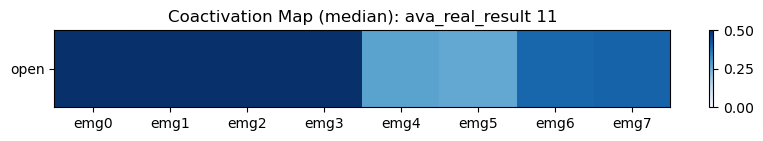

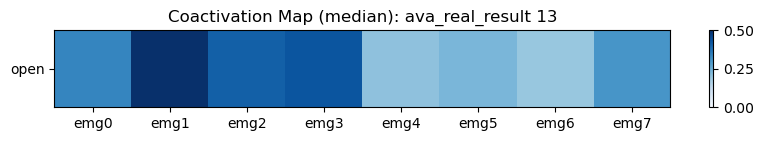

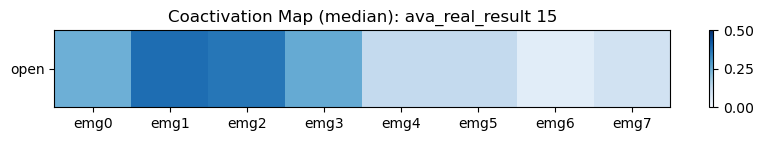

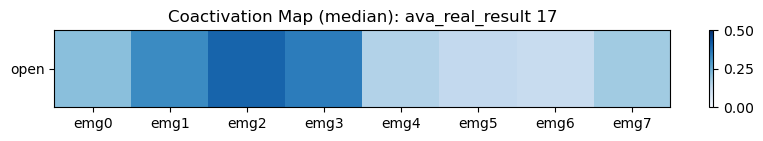

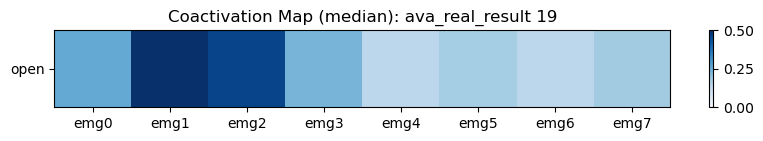

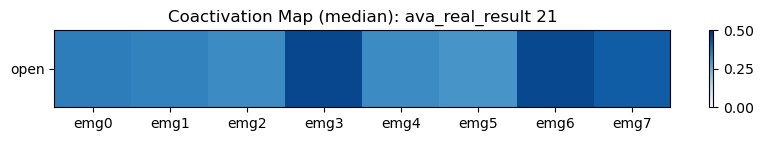

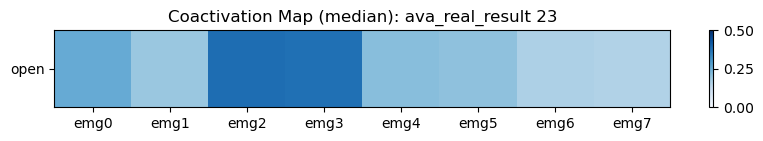

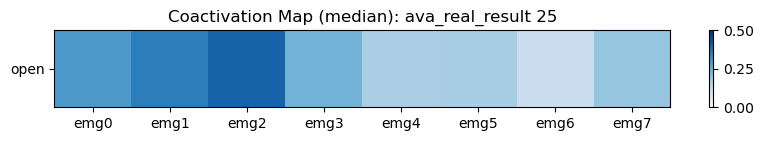

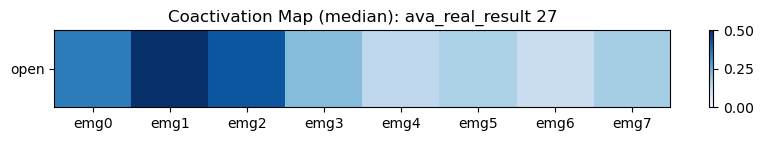

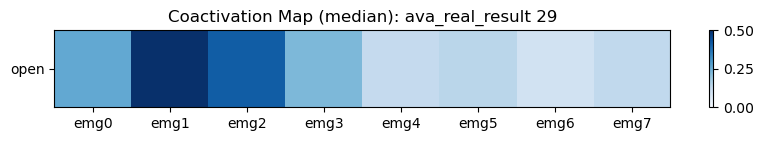

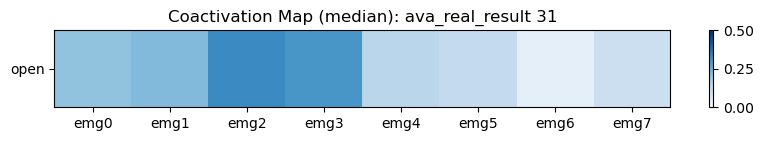

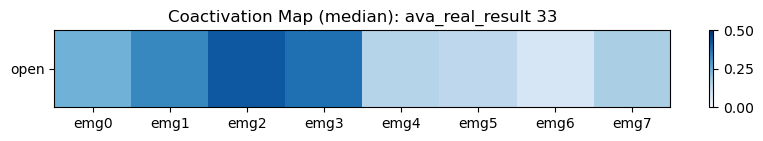

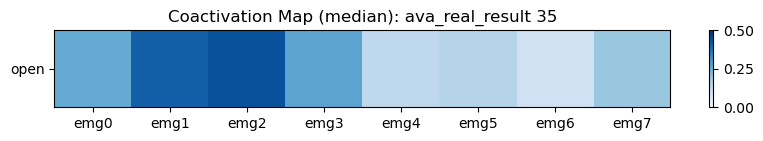

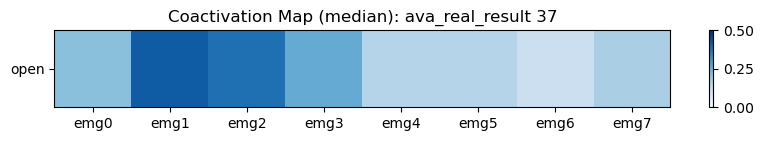

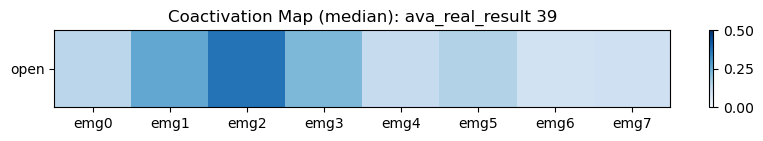

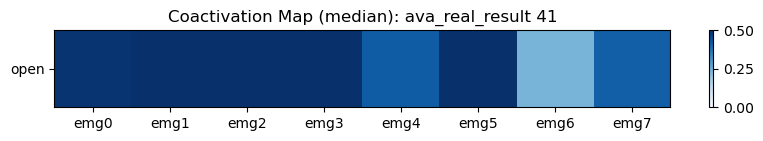

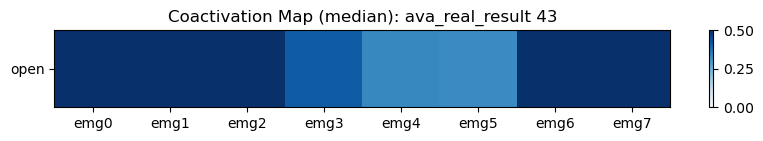

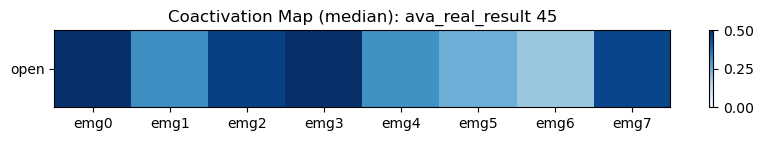

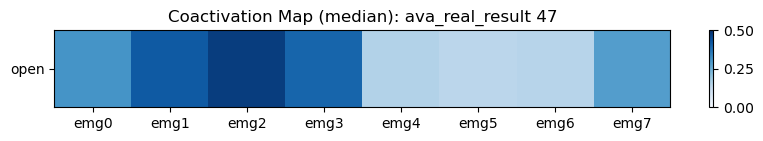

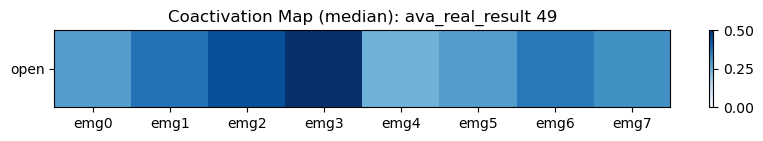

In [27]:
cmap_dict = {0: ('relaxed', 'Reds'), 1: ('open', 'Blues'), 2: ('closed','Greens')}
for i in range(len(stratified_ava)):
    cm = stratified_ava.iloc[i]
    if cm['gt']==1:
        plot_one_class_coactivation_map(cm[emgs], title=f'ava_real_result {i}', cmap=cmap_dict[cm['gt']][1], label=cmap_dict[cm['gt']][0])

# Stratified plots testing

In [28]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

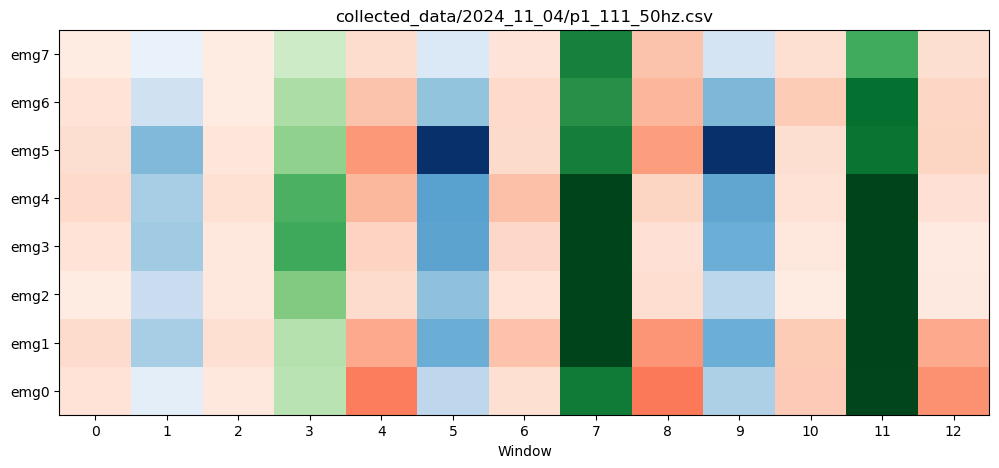

In [29]:
path = 'collected_data/2024_11_04/p1_111_50hz.csv'
df_preprocessed = preprocess_emgs(path, hz=50)
plot_data = get_stratified_cm(df_preprocessed)

num_windows = len(plot_data)

# Compute new window edges for correct alignment
window_edges = np.linspace(0, num_windows, num_windows + 1)  # Shift by 0.5

fig, ax = plt.subplots(figsize=(12, 5))
norm = mcolors.Normalize(vmin=0, vmax=0.5)

# Plot each `gt` group separately
for gt_value, (label, cmap_name) in cmap_dict.items():
    subset = plot_data[plot_data['gt'] == gt_value]  # Filter by gt value

    # Convert to NumPy array for indexing
    plot_array = subset[emgs].T.to_numpy()

    # Get window indices for correct positioning
    window_indices = subset["window"].values

    for i, window in enumerate(window_indices):
        img = plot_array[:, i:i+1]  # Extract single column
        ax.imshow(img, cmap=cmap_dict[gt_value][1], norm=norm, 
                  extent=(window_edges[window], window_edges[window + 1], 0, len(emgs)), 
                  aspect='auto')

# Formatting
ax.set_xlim([0,13])
ax.set_xticks(np.arange(len(plot_data))+0.5,plot_data["window"])  # Align ticks with corrected window placement
ax.set_xlabel("Window")
ax.set_yticks(np.arange(len(emgs)) + 0.5, labels=emgs)
ax.set_title(path)

plt.show()

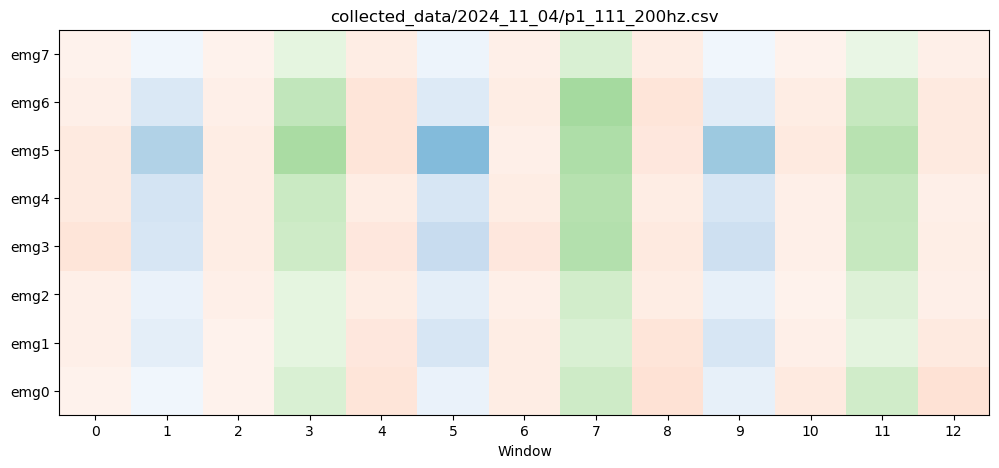

In [30]:
path = 'collected_data/2024_11_04/p1_111_200hz.csv'
df_preprocessed = preprocess_emgs(path, hz=200)
plot_data = get_stratified_cm(df_preprocessed)

num_windows = len(plot_data)

# Compute new window edges for correct alignment
window_edges = np.linspace(0, num_windows, num_windows + 1)  # Shift by 0.5

fig, ax = plt.subplots(figsize=(12, 5))
norm = mcolors.Normalize(vmin=0, vmax=0.5)

# Plot each `gt` group separately
for gt_value, (label, cmap_name) in cmap_dict.items():
    subset = plot_data[plot_data['gt'] == gt_value]  # Filter by gt value

    # Convert to NumPy array for indexing
    plot_array = subset[emgs].T.to_numpy()

    # Get window indices for correct positioning
    window_indices = subset["window"].values

    for i, window in enumerate(window_indices):
        img = plot_array[:, i:i+1]  # Extract single column
        ax.imshow(img, cmap=cmap_dict[gt_value][1], norm=norm, 
                  extent=(window_edges[window], window_edges[window + 1], 0, len(emgs)), 
                  aspect='auto')

# Formatting
ax.set_xlim([0,13])
ax.set_xticks(np.arange(len(plot_data))+0.5,plot_data["window"])  # Align ticks with corrected window placement
ax.set_xlabel("Window")
ax.set_yticks(np.arange(len(emgs)) + 0.5, labels=emgs)
ax.set_title(path)

plt.show()

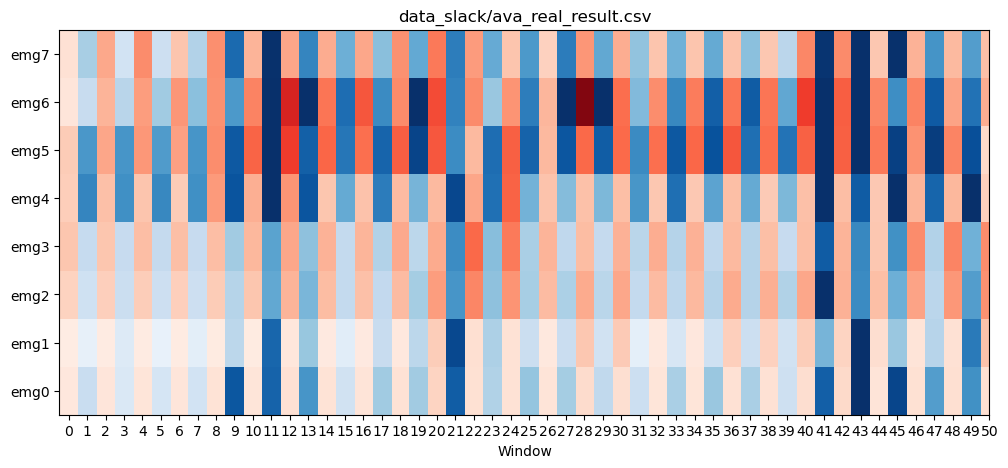

In [31]:
path = 'data_slack/ava_real_result.csv'
df_preprocessed = preprocess_emgs(path, hz=50)
plot_data = get_stratified_cm(df_preprocessed)

num_windows = len(plot_data)

# Compute new window edges for correct alignment
window_edges = np.linspace(0, num_windows, num_windows + 1)  # Shift by 0.5

fig, ax = plt.subplots(figsize=(12, 5))
norm = mcolors.Normalize(vmin=0, vmax=0.5)

# Plot each `gt` group separately
for gt_value, (label, cmap_name) in cmap_dict.items():
    subset = plot_data[plot_data['gt'] == gt_value]  # Filter by gt value

    # Convert to NumPy array for indexing
    plot_array = subset[emgs].T.to_numpy()

    # Get window indices for correct positioning
    window_indices = subset["window"].values

    for i, window in enumerate(window_indices):
        img = plot_array[:, i:i+1]  # Extract single column
        ax.imshow(img, cmap=cmap_dict[gt_value][1], norm=norm, 
                  extent=(window_edges[window], window_edges[window + 1], 0, len(emgs)), 
                  aspect='auto')

# Formatting
ax.set_xlim([0,13])
ax.set_xticks(np.arange(len(plot_data))+0.5,plot_data["window"])  # Align ticks with corrected window placement
ax.set_xlabel("Window")
ax.set_yticks(np.arange(len(emgs)) + 0.5, labels=emgs)
ax.set_title(path)

plt.show()